In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from operator import add
from scipy.optimize import curve_fit
import numpy.fft as fft

%matplotlib inline

1.05150401391


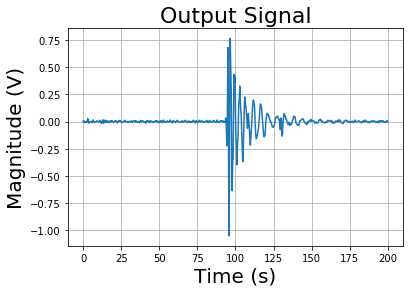

In [24]:

SurfTime=[]

SurfAmp=[]

f = open('Surf_Atten.csv')

Surf = csv.reader(f)

for row in Surf:
    SurfTime.append(float(row[0]))
    SurfAmp.append(float(row[1]))

f.close()


plt.grid(True)
plt.plot(SurfTime,SurfAmp)
plt.title('Output Signal',fontsize=22)
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('Magnitude (V)',fontsize=20)

print(np.sqrt(max(np.array(SurfAmp)*np.array(SurfAmp))))

0.0240384615385


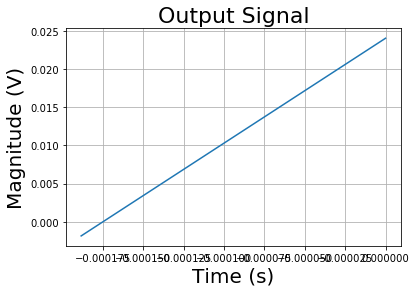

In [23]:
SurfAmp=[]
SurfTime=[]

A=np.loadtxt('Surf_Atten.csv',delimiter=',',unpack=True)


SurfTime=A[:,0]
SurfAmp=A[:,1]




plt.grid(True)
plt.plot(SurfTime,SurfAmp)
plt.title('Output Signal',fontsize=22)
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('Magnitude (V)',fontsize=20)

print(np.sqrt(max(np.array(SurfAmp)*np.array(SurfAmp))))

In [20]:
SurfAmp=[]
SurfTime=[]

A=np.loadtxt('Surf_Atten.csv',delimiter=',',unpack=True)


SurfTime=len(A[:,0])
SurfAmp=len(A[:,1])




plt.grid(True)
plt.plot(SurfTime,SurfAmp)
plt.title('Output Signal',fontsize=22)
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('Magnitude (V)',fontsize=20)

print(np.sqrt(max(np.array(SurfAmp)*np.array(SurfAmp))))

ValueError: could not convert string to float: 

In [25]:
import os,sys
from scipy import stats
import numpy as np

f=open('Surf_Atten.csv', 'r').readlines()
N=len(f)-1
for i in range(0,N):
    w=f[i].split()
    l1=w[1:8]
    l2=w[8:15]
    try:
        list1=[float(x) for x in l1]
        list2=[float(x) for x in l2]

    result=stats.ttest_ind(list1,list2)
    print result[1]

SyntaxError: invalid syntax (<ipython-input-25-a69afdf16a07>, line 15)

0.0240384615385 8316


(0, 85)

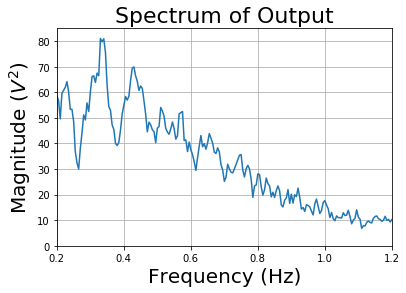

In [32]:
N = len(SurfTime)
dt = SurfTime[1]-SurfTime[0]
print(dt, N)


fft_Surf = fft.fft(SurfAmp)
fft_Surf_shift = fft.fftshift(fft_Surf)

freq_Surf = fft.fftfreq(N, dt)

SURF_FFT = fft_Surf_shift

plt.plot(fft.fftshift(freq_Surf), abs(SURF_FFT))

#plt.axis([0, 2.5*10**(10),10*10**(-8),10e7])
plt.grid(True)
plt.title('Spectrum of Output',fontsize=22)
plt.xlabel('Frequency (Hz)',fontsize=20)
plt.ylabel('Magnitude ($V^2$)',fontsize=20)
plt.xlim([0.2,1.2])
plt.ylim(0,85)

0.0021351320408


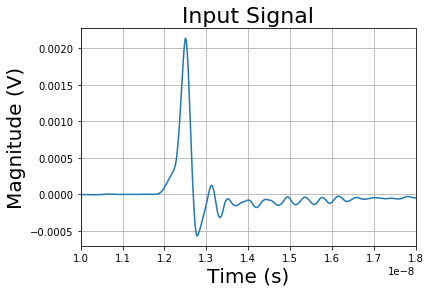

In [33]:
AmpaAmp=[]
AmpaTime=[]

f = open('Ampa_Atten.csv')

Ampa = csv.reader(f)

for row in Ampa:
    AmpaTime.append(float(row[0])*10**(-9))
    AmpaAmp.append(float(row[1]))

f.close()
plt.grid(True)
plt.plot(AmpaTime,AmpaAmp)
plt.title('Input Signal',fontsize=22)
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('Magnitude (V)',fontsize=20)
plt.xlim(1e-8,.18e-7)
print(np.sqrt(max(np.array(AmpaAmp)*np.array(AmpaAmp))))

In [34]:
N = len(AmpaTime)
dt = AmpaTime[1]-AmpaTime[0]



fft_Ampa = fft.rfft(AmpaAmp)
fft_ampa_shift = fft.fftshift(fft_Ampa)

freq_Ampa = fft.rfftfreq(N, dt)

electronics_shift=fft_Surf_shift/fft_ampa_shift




f=open('ElectronicsTransferamp.txt','w')

for i in range(len(freq_Ampa)):
    f.write(str(electronics_shift[i])+',')#+' '+str(fft_Surf_shift[i]/fft_ampa_shift[i])+'\n')
    
g=open('ElectronicsTransferFreq.txt','w')

for i in range(len(freq_Ampa)):
    g.write(str(fft.fftshift(freq_Ampa)[i])+',')#+' '+str(fft_Surf_shift[i]/fft_ampa_shift[i])+'\n')

    
    


AMPA_FFT =fft_ampa_shift

plt.plot(fft.fftshift(freq_Ampa), abs(AMPA_FFT))

print(dt)

#plt.axis([0, 2.5*10**(10),10*10**(-13),10*10**(-1)])
plt.grid(True)
plt.title('Spectrum of Input',fontsize=22)
plt.xlabel('Frequency (Hz)',fontsize=20)
plt.ylabel('Magnitude ($V^2$)',fontsize=20)
plt.xlim([0,0.5*10**10])
plt.ylim(0,0.03)

ValueError: operands could not be broadcast together with shapes (8316,) (4159,) 

In [8]:
N = len(AmpaTime)
dt = AmpaTime[1]-AmpaTime[0]



fft_Ampa = fft.fft(AmpaAmp)
fft_ampa_shift = fft.fftshift(fft_Ampa)

freq_Ampa = fft.fftfreq(N, dt)

electronics_shift=fft_Surf_shift/fft_ampa_shift




f=open('ElectronicsTransferamp.txt','w')

for i in range(len(freq_Ampa)):
    f.write(str(electronics_shift[i])+',')#+' '+str(fft_Surf_shift[i]/fft_ampa_shift[i])+'\n')
    
g=open('ElectronicsTransferFreq.txt','w')

for i in range(len(freq_Ampa)):
    g.write(str(fft.fftshift(freq_Ampa)[i])+',')#+' '+str(fft_Surf_shift[i]/fft_ampa_shift[i])+'\n')

    
    


AMPA_FFT =fft_ampa_shift

plt.plot(fft.fftshift(freq_Ampa), abs(AMPA_FFT))

print(dt)

#plt.axis([0, 2.5*10**(10),10*10**(-13),10*10**(-1)])
plt.grid(True)
plt.title('Spectrum of Input',fontsize=22)
plt.xlabel('Frequency (Hz)',fontsize=20)
plt.ylabel('Magnitude ($V^2$)',fontsize=20)
plt.xlim([0,0.5*10**10])
plt.ylim(0,0.03)

NameError: name 'fft_Surf_shift' is not defined

In [1]:
Transfer = SURF_FFT/AMPA_FFT




plt.semilogy(fft.fftshift(freq_Ampa), abs(Transfer),'.')

plt.axis([0, 1.2*10**(9),0,10**(5)])

plt.title('Transfer Function of the Front End Electronics',fontsize=22)
plt.xlabel('Frequency (Hz)',fontsize=20)
plt.ylabel('Magnitude',fontsize=20)


plt.grid(True)




NameError: name 'SURF_FFT' is not defined

In [12]:
fshift=fft.fftshift(Transfer)
freq=fft.fftfreq(N,dt)

plt.semilogy(fft.fftshift(freq_Ampa),20*np.log10(abs(Transfer)),'.')
plt.title('Front-End Electronics Transfer Function',fontsize=14)
plt.axis([0, 1.2*10**(9),10**(0),10**(5)])

NameError: name 'Transfer' is not defined

In [13]:
f_Trans=fft.fft(SurfAmp)/fft.fft(AmpaAmp)
y_Trans=fft.irfft(f_Trans)
y_Trans=y_Trans[0:(len(y_Trans)+2)/2]


print(len(AmpaTime),
len(f_Trans),
len(y_Trans))


plt.plot(AmpaTime,y_Trans)

ValueError: Invalid number of FFT data points (0) specified.